<a href="https://colab.research.google.com/github/VaishnaviMudaliar/Customer-Segmentation-using-kmeans-clustering/blob/main/Customer_Segmentation_using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Reading the dataset

data = pd.read_csv("/content/Mall_Customers.csv")


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

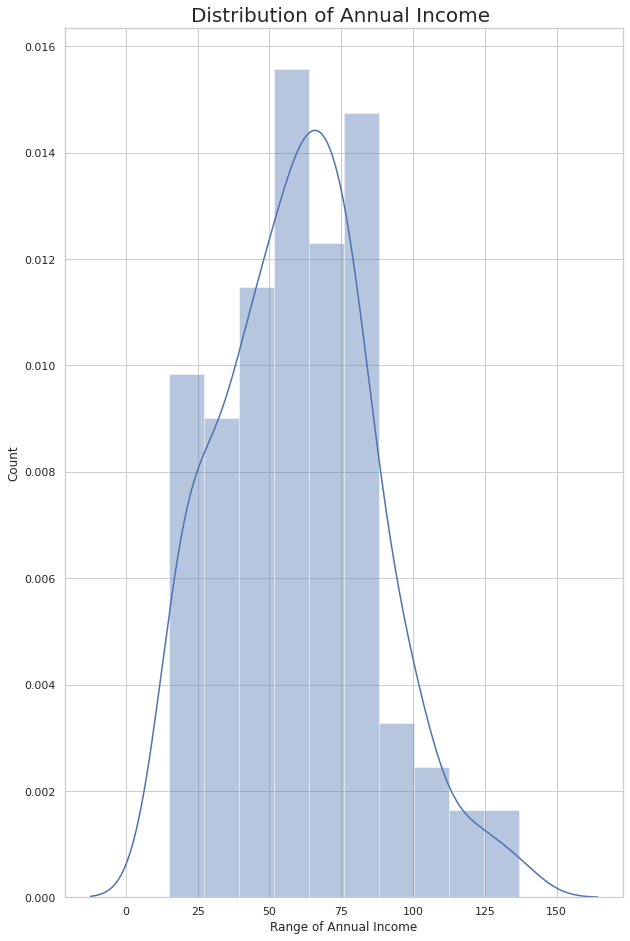

In [5]:
#Distribution of Annual income

plt.figure(figsize=(10,16))
sns.set(style = "whitegrid")
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income ' , fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

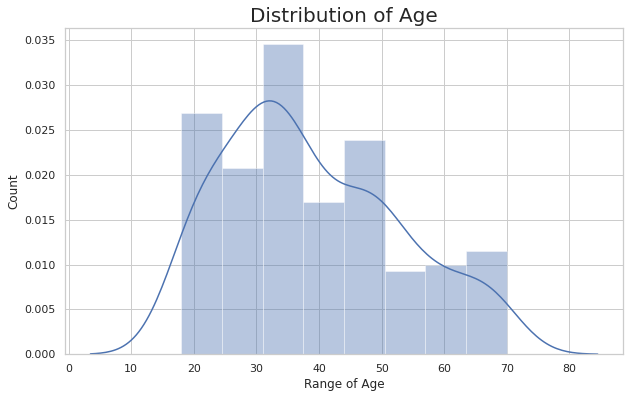

In [6]:
#Distribution of age

plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age' , fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

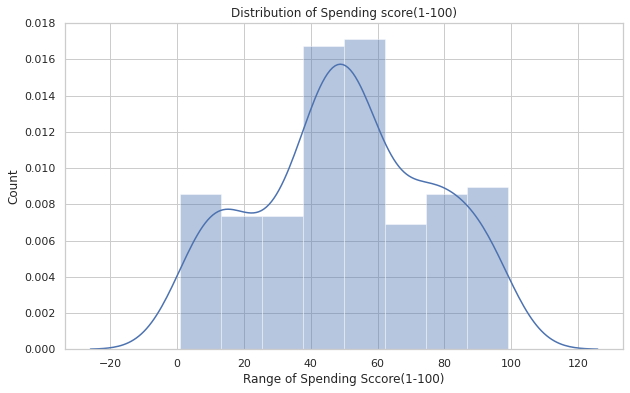

In [7]:
#Distribution of spending score
plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending score(1-100)')
plt.xlabel('Range of Spending Sccore(1-100)')
plt.ylabel('Count')

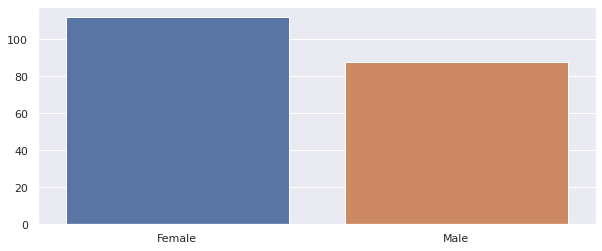

In [8]:
#Gender Analysis

genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
sns.barplot(x = genders.index , y = genders.values)
plt.show()

In [9]:
# We take just the Annual Income and Spending score

df1 = data[["CustomerID","Gender","Age","Annual Income (k$)" , "Spending Score (1-100)"]]
X = df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [10]:
# The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


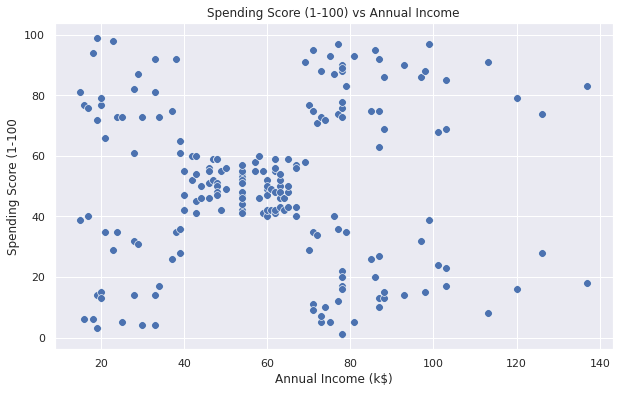

In [11]:
# Scatterplot of the input data
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data  = X,s = 60) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.title('Spending Score (1-100) vs Annual Income')
plt.show()

In [12]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans


In [13]:
#Calculating within cluster sum of squared errors
wcss=[]
for i in range(1,11):
  km = KMeans(n_clusters = i)
  km.fit(X)
  wcss.append(km.inertia_)

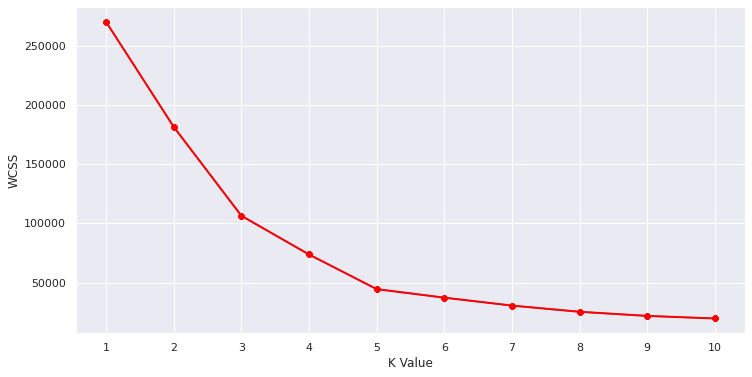

In [14]:
# Elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [15]:
# Taking 5 clusters

km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


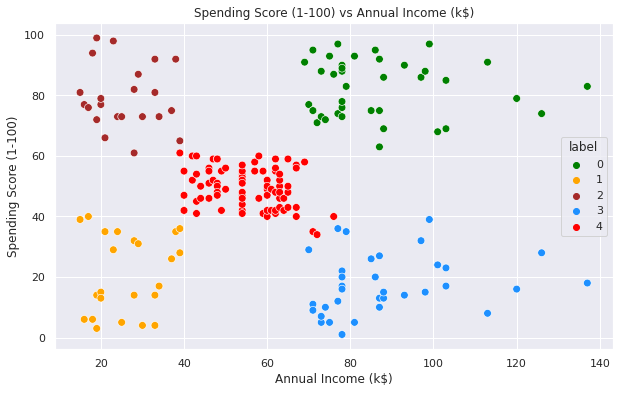

In [16]:
# Scatter plot of clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

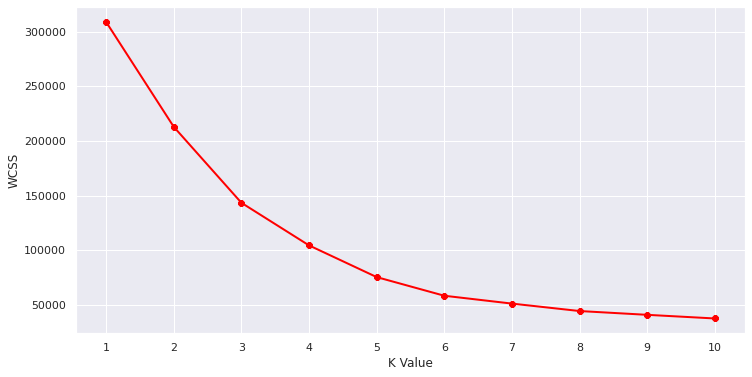

In [19]:
#Taking the features
df2=df1
X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

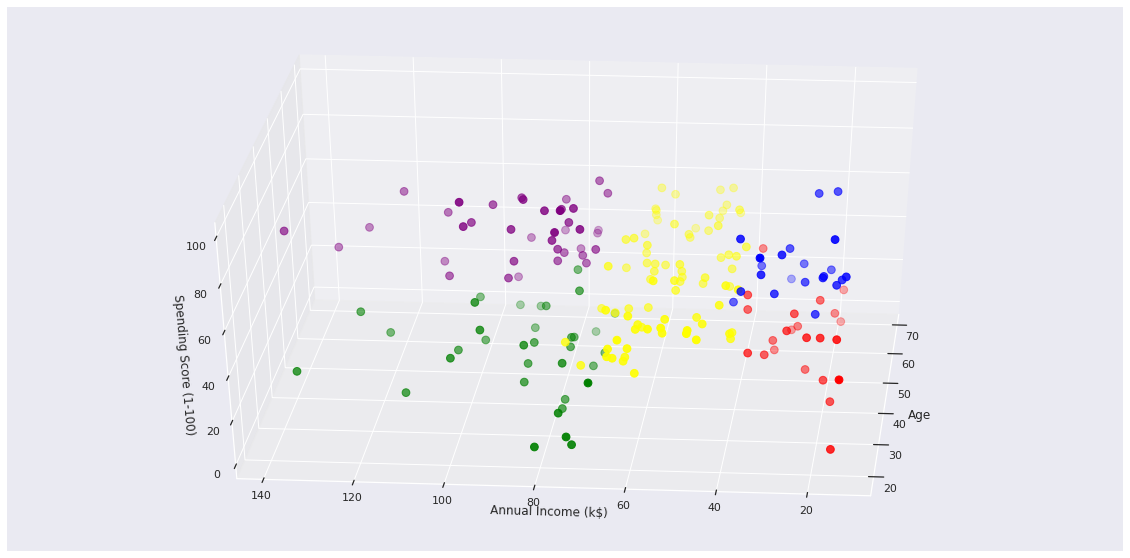

In [20]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [21]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 5th group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  